In [122]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [123]:
# Sea level pressure from NCEP
# https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html
# in the talbe i chose sea level pressure, monthly mean
fn='./slp.mon.mean.nc'
dt=xr.open_dataset(fn)
dt.close()
dt.coords['lon'] = np.mod(dt.coords['lon'] + 180,360) - 180
dt = dt.sortby(dt.lon)
dt

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 864)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-12-01
Data variables:
    slp      (time, lat, lon) float32 1014.25446 1014.25446 ... 1004.96204
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [124]:
# seasonal climatology
dts = dt.groupby('time.month').mean('time')
dts2= dts.sel(lon=slice(-175,-115),lat=slice(65,20))
dts2
# winter
dtsw = dts2.sel(month=slice(1,3)).mean('month')
# summer
dtss = dts2.sel(month=slice(6,8)).mean('month')
dtsw

<xarray.Dataset>
Dimensions:  (lat: 19, lon: 25)
Coordinates:
  * lat      (lat) float32 65.0 62.5 60.0 57.5 55.0 ... 30.0 27.5 25.0 22.5 20.0
  * lon      (lon) float32 -175.0 -172.5 -170.0 -167.5 ... -120.0 -117.5 -115.0
Data variables:
    slp      (lat, lon) float32 1013.6155 1013.04834 ... 1016.45526 1016.0594

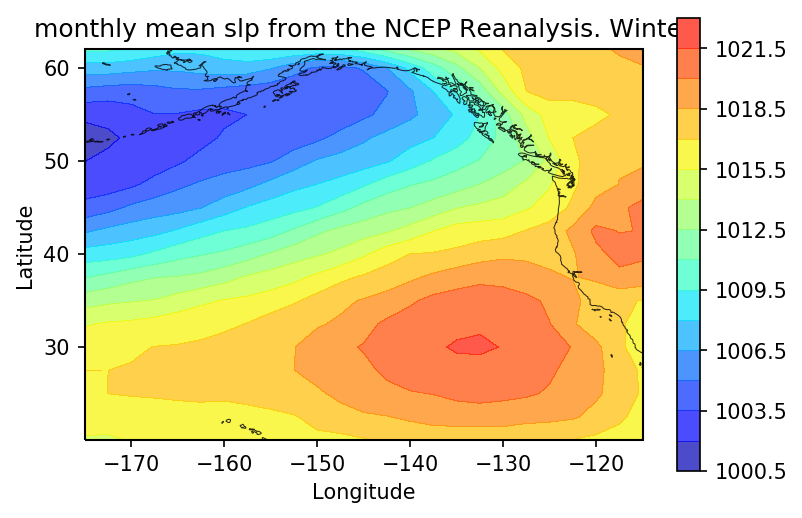

In [125]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtsw.lon,dtsw.lat,dtsw.slp,15, alpha=0.7, cmap='jet', vmin=1000, vmax=1025)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title(dt.attrs['title']+'. Winter')
plt.savefig('./SLP_winter_NCEP.png')
plt.show()

dt.attr

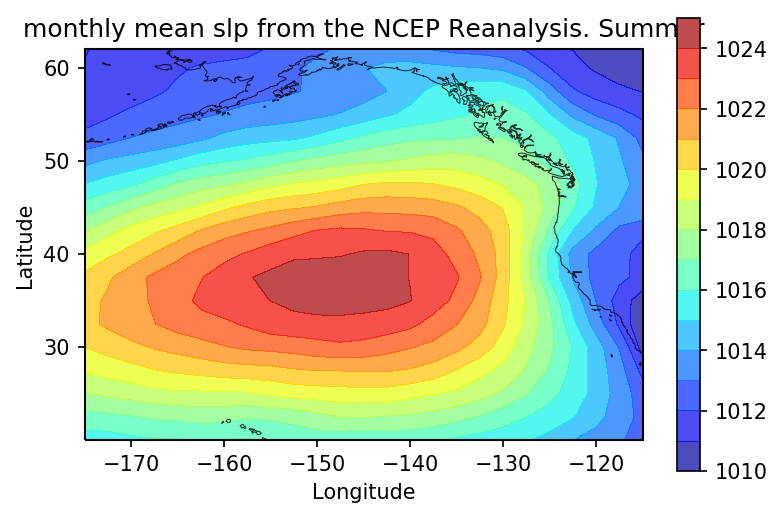

In [126]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtss.lon,dtss.lat,dtss.slp,15, alpha=0.7, cmap='jet', vmin=1010, vmax=1025)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title(dt.attrs['title']+'. Summer')
plt.savefig('./SLP_summer_NCEP.png')
plt.show()

In [127]:
## from HadSST
# https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html
# at the bottom of the page is the netcdf file
fn='../../../data/HadISST1/rawdata/HadISST_sst.nc'
dt=xr.open_dataset(fn)
dt.close()
dt=dt.where(dt.sst>-10)
dt

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1797)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2019-09-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv, latitude, longitude) float32 nan nan nan ... nan nan
    sst        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netc

In [128]:
dts = dt.sel(longitude=slice(-175,-115),latitude=slice(65,20),time=slice('1950-01-01','2018-12-31'))
print(dts)
# seasonal climatology
dts = dt.groupby('time.month').mean('time')

# winter
dtsw = dts.sel(month=slice(1,3)).mean('month')
# summer
dtss = dts.sel(month=slice(6,8)).mean('month')
dtsw

<xarray.Dataset>
Dimensions:    (latitude: 45, longitude: 60, nv: 2, time: 828)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16T12:00:00 ... 2018-12-16T12:00:00
  * latitude   (latitude) float32 64.5 63.5 62.5 61.5 ... 23.5 22.5 21.5 20.5
  * longitude  (longitude) float32 -174.5 -173.5 -172.5 ... -117.5 -116.5 -115.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv, latitude, longitude) float32 29219.0 nan ... 54421.0
    sst        (time, latitude, longitude) float32 -1.8 nan ... 23.763052
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp fo

/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (nv, latitude, longitude) float32 42879.14 42879.14 ... nan nan
    sst        (latitude, longitude) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan

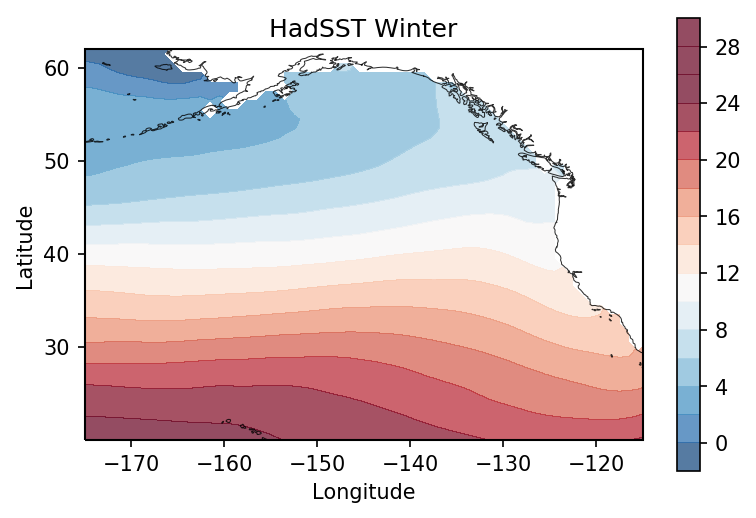

In [129]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtsw.longitude,dtsw.latitude,dtsw.sst,15, alpha=0.7, cmap='RdBu_r',vmin=-2,vmax=24)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('HadSST Winter')
plt.savefig('./SST_winter_HadSST.png')
plt.show()

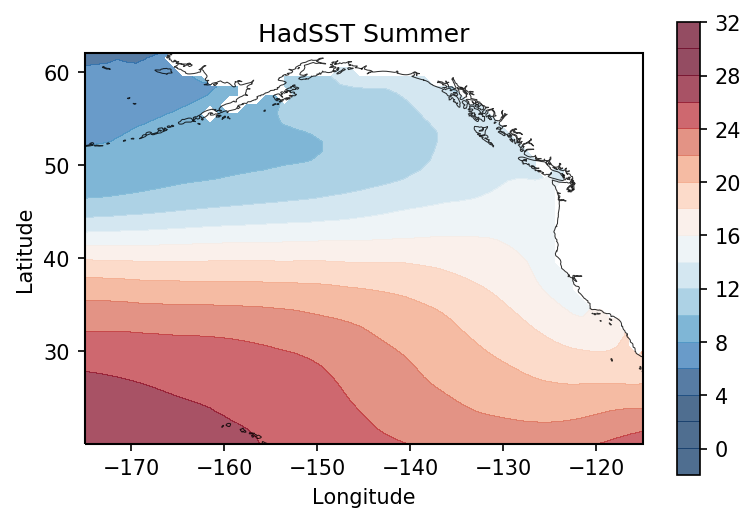

In [130]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtss.longitude,dtss.latitude,dtss.sst,20, alpha=0.7, cmap='RdBu_r',vmin=4,vmax=28)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('HadSST Summer')
plt.savefig('./SST_summer_HadSST.png')
plt.show()